In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Signal and Weight Vector Spaces

### Linear Algebra and Neural Networks

Linear algebra is the core of the mathematics required for understanding neural networks. In Chapters 3 and 4, we saw the utility of representing the inputs and outputs of neural networks as vectors. In addition, we noted that it is often useful to think of the rows of a weight matrix as vectors in the same vector space as the input vectors. Recall from Chapter 3 that in the Hamming network, the rows of the weight matrix of the feedforward layer were equal to the prototype vectors. In fact, the purpose of the feedforward layer was to calculate the inner products between the prototype vectors and the input vector. 

In the single neuron perceptron network, we noted that the decision boundary was always orthogonal to the weight matrix (a row vector). In this chapter, we want to review the basic concepts of vector spaces (e.g., inner products, orthogonality) in the context of neural networks. We will begin with a general definition of vector spaces and then present the basic properties of vectors that are most useful for neural network applications.

## Notation

One comment about notation before we begin. All of the vectors we have discussed so far have been ordered $ n $-tuples (columns) of real numbers and are represented by bold small letters, e.g., 

$$ 
\mathbf{x} = 
\begin{pmatrix} 
x_1 \\ 
x_2 \\ 
\vdots \\ 
x_n 
\end{pmatrix}. 
$$ 

These are vectors in $ \mathbb{R}^n $, the standard $ n $-dimensional Euclidean space. In this chapter, we will also be talking about more general vector spaces than $ \mathbb{R}^n $. These more general vectors will be represented with a script typeface, as in $ \mathscr{x} $. We will show in this chapter how these general vectors can often be represented by columns of numbers.

## Linear Vector Spaces

### Definition of a Vector Space

A linear vector space, $ X $, is a set of elements (vectors) defined over a scalar field, $ F $, that satisfies the following conditions:

1. An operation called vector addition is defined such that if $ \mathbf{x} \in X $ ( $ \mathbf{x} $ is an element of $ X $ ) and $ \mathbf{y} \in X $, then $ \mathbf{x} + \mathbf{y} \in X $.
2. $ \mathbf{x} + \mathbf{y} = \mathbf{y} + \mathbf{x} $.
3. $ (\mathbf{x} + \mathbf{y}) + \mathbf{z} = \mathbf{x} + (\mathbf{y} + \mathbf{z}) $.
4. There is a unique vector $ \mathbf{0} \in X $, called the zero vector, such that $ \mathbf{x} + \mathbf{0} = \mathbf{x} $ for all $ \mathbf{x} \in X $.
5. For each vector $ \mathbf{x} \in X $, there is a unique vector $ -\mathbf{x} \in X $, such that $ \mathbf{x} + (-\mathbf{x}) = \mathbf{0} $.
6. An operation called multiplication is defined such that for all scalars $ a \in F $, and all vectors $ \mathbf{x} \in X $, $ a\mathbf{x} \in X $.
7. For any $ \mathbf{x} \in X $, $ 1\mathbf{x} = \mathbf{x} $ $for scalar $.
8. For any two scalars \( a \in F \) and \( b \in F \), and any \( \mathbf{x} \in X \), \( a(b\mathbf{x}) = (ab)\mathbf{x} \).
9. $ (a + b)\mathbf{x} = a\mathbf{x} + b\mathbf{x} $.
10. $ a(\mathbf{x} + \mathbf{y}) = a\mathbf{x} + a\mathbf{y} $.

### Examples of Vector Spaces

To illustrate these conditions, let’s investigate a few sample sets and determine whether or not they are vector spaces.

**1. Two-dimensional Euclidean Space $ \mathbb{R}^2 $**

This is clearly a vector space, and all ten conditions are satisfied for the standard definitions of vector addition and scalar multiplication.

**2. Bounded Sets in $ \mathbb{R}^2 $**

Consider a bounded area $ X $ in $ \mathbb{R}^2 $. This set does not satisfy all conditions; for instance, even condition 1 is not satisfied. If \( \mathbf{x} \) and $ \mathbf{y} $ are in $ X $, then $ \mathbf{x} + \mathbf{y} $ may not be in $ X $. Therefore, no bounded sets can be vector spaces.

**3. Infinite Lines in $ \mathbb{R}^2 $**

Any line that passes through the origin will satisfy all ten conditions. If a line does not pass through the origin, then condition 4 would not be satisfied.

**4. Set of Polynomials $ P $**

Consider the set of all polynomials of degree less than or equal to 2:

$$
\mathbf{x} = 2 + t + 4t^2, \quad \mathbf{y} = 1 + 5t.
$$

The set $ P $ satisfies all ten conditions, proving that it is a vector space.

**5. Set of Continuous Functions $ C[0, 1] $**

Consider the set of all continuous functions defined on the interval $[0, 1]$:

$$
\mathbf{x} = \sin(t), \quad \mathbf{y} = e^{-2t}.
$$

The sum of two continuous functions is also continuous, and multiplying a continuous function by a scalar preserves continuity. Hence, $ C[0, 1] $ is also a vector space.

This set differs from the other vector spaces we discussed; it is infinite-dimensional. We will define what we mean by dimension later in this chapter.


## Linear Independence

Now that we have defined what we mean by a vector space, we will investigate some of the properties of vectors. The first properties are linear dependence and linear independence.

## Linear Dependence

Consider $ n $ vectors $ \{ \mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n \} $. If there exist $ n $ scalars $ a_1, a_2, \ldots, a_n $, at least one of which is nonzero, such that

$$
a_1 \mathbf{x}_1 + a_2 \mathbf{x}_2 + \cdots + a_n \mathbf{x}_n = \mathbf{0}, \tag{5.4}
$$

then the set $ \{ \mathbf{x}_i \} $ is said to be **linearly dependent**.

## Linear Independence

The converse statement is: If 

$$
a_1 \mathbf{x}_1 + a_2 \mathbf{x}_2 + \cdots + a_n \mathbf{x}_n = \mathbf{0}
$$ 

implies that each $ a_i = 0 $, then the set $ \{ \mathbf{x}_i \} $ is a set of **linearly independent vectors**.

### Key Points
- A set of vectors is **linearly dependent** if at least one of the vectors can be expressed as a linear combination of the others.
- A set of vectors is **linearly independent** if no vector in the set can be written as a linear combination of the others.

Understanding these concepts is crucial for analyzing vector spaces and their dimensionality.
## Equivalent Definitions of Linear Independence

Note that these definitions are equivalent to saying that if a set of vectors is independent, then no vector in the set can be written as a linear combination of the other vectors.

### Example of Independence

Consider the pattern recognition problem from Chapter 3. The two prototype patterns (orange and apple) were given by:

$$
\mathbf{p}_1 = \begin{bmatrix}
1 \\
-1
\end{bmatrix}, \quad 
\mathbf{p}_2 = \begin{bmatrix}
1 \\
-1
\end{bmatrix}. \tag{5.5}
$$

Let 

$$
a_1 \mathbf{p}_1 + a_2 \mathbf{p}_2 = \mathbf{0}. 
$$ 

Then we have:

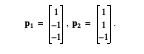



This can only be true if $ a_1 = a_2 = 0 $. Therefore, $ \mathbf{p}_1 $ and $ \mathbf{p}_2 $ are **linearly independent**.

### Example of Dependence

Consider vectors from the space $ P_2 $ of polynomials of degree less than or equal to 2. Three vectors from this space would be:


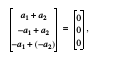

Note that if we let $ a_1 = 1 $, $ a_2 = -1 $, and $ a_3 = 1 $, then:

$$
a_1 \mathbf{x}_1 + a_2 \mathbf{x}_2 + a_3 \mathbf{x}_3 = \mathbf{0}. \tag{5.8}
$$

Therefore, these three vectors are **linearly dependent**.

### Conclusion

- The first example illustrates a case of linear independence, where no vector can be expressed as a combination of others.
- The second example illustrates linear dependence, where one vector can be expressed as a combination of others in the set.

## Equivalent Definitions of Linear Independence

Note that these definitions are equivalent to saying that if a set of vectors is independent, then no vector in the set can be written as a linear combination of the other vectors.

### Example of Independence

Consider the pattern recognition problem from Chapter 3. The two prototype patterns (orange and apple) were given by:

$$
\mathbf{p}_1 = \begin{bmatrix}
1 \\
-1
\end{bmatrix}, \quad 
\mathbf{p}_2 = \begin{bmatrix}
1 \\
-1
\end{bmatrix}. \tag{5.5}
$$

Let 

$$
a_1 \mathbf{p}_1 + a_2 \mathbf{p}_2 = \mathbf{0}. 
$$ 

Then we have:

$$
\begin{aligned}
a_1 + a_2 &= 0, \\
-a_1 + a_2 &= 0, \\
-a_1 - a_2 &= 0.
\end{aligned} \tag{5.6}
$$

This can only be true if $ a_1 = a_2 = 0 $. Therefore, $ \mathbf{p}_1 $ and $ \mathbf{p}_2 $ are **linearly independent**.

### Example of Dependence

Consider vectors from the space $ P_2 $ of polynomials of degree less than or equal to 2. Three vectors from this space would be:


$x_1 = 1 + t + t^2 $
$x_2 = 2 + 2t + t^2 $
$x_3 = 1 + t $

Note that if we let $ a_1 = 1 $, $ a_2 = -1 $, and $ a_3 = 1 $, then:

$$
a_1 \mathbf{x}_1 + a_2 \mathbf{x}_2 + a_3 \mathbf{x}_3 = \mathbf{0}. \tag{5.8}
$$

Therefore, these three vectors are **linearly dependent**.

### Conclusion

- The first example illustrates a case of linear independence, where no vector can be expressed as a combination of others.
- The second example illustrates linear dependence, where one vector can be expressed as a combination of others in the set.


## Inner Product

From our brief encounter with neural networks in Chapters 3 and 4, it is clear that the inner product is fundamental to the operation of many neural networks. Here we will introduce a general definition for inner products and then give several examples.

### Definition of Inner Product

Any scalar function of $ x $ and $ y $ can be defined as an inner product $ (x,y) $, provided that the following properties are satisfied:

1. $$ (x,y) = (y,x) $$
2. $$ (x,a y_1 + b y_2) = a (x,y_1) + b (x,y_2) $$
3. $$ (x,x) \geq 0 $$, where equality holds if and only if $ x $ is the zero vector.

The standard inner product for vectors in $ \mathbb{R}^n $ is given by:

$$ x \cdot y = x_1 y_1 + x_2 y_2 + \ldots + x_n y_n \tag{5.11} $$

However, this is not the only possible inner product. Consider again the set $ C[0, 1] $ of all continuous functions defined on the interval $[0, 1]$. The following scalar function is also an inner product:

$$ (x,y) = \int_0^1 x(t) y(t) \, dt \tag{5.12} $$

### Norm

The next operation we need to define is the norm, which is based on the concept of vector length. A scalar function $ \|x\| $ is called a norm if it satisfies the following properties:

1. $$ \|x\| \geq 0 $$
2. $$ \|x\| = 0 \text{ if and only if } x = 0 $$
3. $$ \|ax\| = |a| \|x\| \text{ for scalar } a $$
4. $$ \|x+y\| \leq \|x\| + \|y\| $$

There are many functions that satisfy these conditions. One common norm is based on the inner product:

$$ \|x\|_2 = \sqrt{(x,x)} \tag{5.13} $$

For Euclidean spaces $ \mathbb{R}^n $, this yields the familiar norm:

$$ \|x\|_2 = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2} \tag{5.14} $$

In neural network applications, it is often useful to normalize the input vectors. This means that $ \|p_i\| = 1 $ for each input vector.

### Angle

Using the norm and the inner product, we can generalize the concept of an angle for vector spaces of dimension greater than two. The angle $ \theta $ between two vectors $ x $ and $ y $ is defined by:

$$ \cos \theta = \frac{(x,y)}{\|x\| \|y\|} \tag{5.15} $$

### Orthogonality

Now that we have defined the inner product operation, we can introduce the important concept of orthogonality. Two vectors $ x, y \in X $ are said to be orthogonal if:

$$ (x,y) = 0 $$

Orthogonality is an important concept in neural networks. We will see in Chapter 7 that when the prototype vectors of a pattern recognition problem are orthogonal and normalized, a linear associator neural network can be trained, using the Hebb rule, to achieve perfect recognition.

In addition to orthogonal vectors, we can also have orthogonal spaces. A vector $ x \in X $ is orthogonal to a subspace $ X_1 $ if $ x $ is orthogonal to every vector in $ X_1 $. This is typically represented as $ x \perp X_1 $. A subspace $ X_1 $ is orthogonal to a subspace $ X_2 $ if every vector in $ X_1 $ is orthogonal to every vector in $ X_2 $. This is represented by $ X_1 \perp X_2 $.

The figure illustrates the two orthogonal spaces that were used in the perceptron example of Chapter 3.  The $ p_1, p_3 $ plane is a subspace of $ \mathbb{R}^3 $, which is orthogonal to the $ p_2 $ axis (which is another subspace of $ \mathbb{R}^3 $). The $ p_1, p_3 $ plane was the decision boundary of a perceptron network.

In Solved Problem P5.1 we will show that the perceptron decision boundary will be a vector space whenever the bias value is zero.


Inner Product (p1, p2): 0
Norm of p1: 1.4142135623730951
Norm of p2: 1.4142135623730951
Angle between p1 and p2 (radians): 1.5707963267948966
Are p1 and p2 orthogonal? True
Are x1 and x2 orthogonal? True


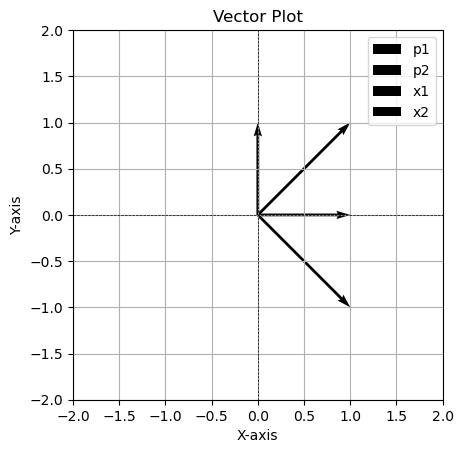

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def inner_product(x, y):
    return np.dot(x, y)

def norm(x):
    return np.linalg.norm(x)

def angle_between(x, y):
    inner_prod = inner_product(x, y)
    norm_x = norm(x)
    norm_y = norm(y)
    
    if norm_x == 0 or norm_y == 0:
        raise ValueError("Cannot compute angle with zero-length vector.")
    
    cos_theta = inner_prod / (norm_x * norm_y)
    angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    return angle

def are_orthogonal(x, y):
    return np.isclose(inner_product(x, y), 0)

def plot_vectors(vectors, labels):
    """
    Plot the given vectors in 2D space.
    
    Parameters:
    vectors (list of numpy.ndarray): List of vectors to plot.
    labels (list of str): Labels for each vector.
    """
    plt.figure()
    ax = plt.gca()
    origin = np.zeros(2)  # origin point

    # Plot each vector
    for v, label in zip(vectors, labels):
        ax.quiver(*origin, *v, angles='xy', scale_units='xy', scale=1, label=label)

    # Set limits and labels
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.axhline(0, color='black',linewidth=0.5, ls='--')
    ax.axvline(0, color='black',linewidth=0.5, ls='--')
    ax.grid()
    plt.title('Vector Plot')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Example usage
if __name__ == "__main__":
    # Define two vectors
    p1 = np.array([1, -1])
    p2 = np.array([1, 1])
    
    # Calculate inner product
    print("Inner Product (p1, p2):", inner_product(p1, p2))
    
    # Calculate norms
    print("Norm of p1:", norm(p1))
    print("Norm of p2:", norm(p2))
    
    # Calculate angle between p1 and p2
    angle_rad = angle_between(p1, p2)
    print("Angle between p1 and p2 (radians):", angle_rad)
    
    # Check orthogonality
    print("Are p1 and p2 orthogonal?", are_orthogonal(p1, p2))
    
    # Define more vectors for additional tests
    x1 = np.array([1, 0])
    x2 = np.array([0, 1])
    
    print("Are x1 and x2 orthogonal?", are_orthogonal(x1, x2))  # Should be True

    # Plot the vectors
    plot_vectors([p1, p2, x1, x2], ['p1', 'p2', 'x1', 'x2'])


# Gram-Schmidt Orthogonalization

The Gram-Schmidt process is a method for converting a set of independent vectors into a set of orthogonal vectors that spans the same vector space. This process can be particularly useful in various applications, including neural networks and numerical methods.

## Definitions

Let $ \{ y_1, y_2, \ldots, y_n \} $ be a set of $ n $ independent vectors. We aim to obtain $ n $ orthogonal vectors $ \{ v_1, v_2, \ldots, v_n \} $.

1. **First Orthogonal Vector**:
   $$
   v_1 = y_1
   $$

2. **Second Orthogonal Vector**:
   To obtain the second orthogonal vector, we subtract the projection of $ y_2 $ onto $ v_1 $:
   $$
   v_2 = y_2 - a v_1
   $$
   where \( a \) is determined by ensuring \( v_2 \) is orthogonal to \( v_1 \):
   $$
   (v_1, v_2) = (v_1, y_2 - a v_1) = (v_1, y_2) - a (v_1, v_1) = 0
   $$
   This leads to:
   $$
   a = \frac{(v_1, y_2)}{(v_1, v_1)}
   $$

3. **General Step**:
   For the \( k \)-th vector, the orthogonal vector is computed as:
   $$
   v_k = y_k - \sum_{i=1}^{k-1} \frac{(v_i, y_k)}{(v_i, v_i)} v_i
   $$

## Example

Let's illustrate the Gram-Schmidt process using the following independent vectors in $ \mathbb{R}^2 $:
$$
y_1 = \begin{pmatrix} 2 \\ 1 \end{pmatrix}, \quad y_2 = \begin{pmatrix} 1 \\ 2 \end{pmatrix}
$$

1. **Calculate $ v_1 $**:
   $$
   v_1 = y_1 = \begin{pmatrix} 2 \\ 1 \end{pmatrix}
   $$

2. **Calculate $ v_2 $**:
   First, compute $ a $:
   $$
   a = \frac{(v_1, y_2)}{(v_1, v_1)}
   $$
   To find \( (v_1, y_2) \):
   $$
   (v_1, y_2) = \begin{pmatrix} 2 \\ 1 \end{pmatrix}^T \begin{pmatrix} 1 \\ 2 \end{pmatrix} = 2 \cdot 1 + 1 \cdot 2 = 4
   $$
   And:
   $$
   (v_1, v_1) = \begin{pmatrix} 2 \\ 1 \end{pmatrix}^T \begin{pmatrix} 2 \\ 1 \end{pmatrix} = 2^2 + 1^2 = 5
   $$
   Therefore:
   $$
   a = \frac{4}{5} = 0.8
   $$
   Now, compute $ v_2 $:
   $$
   v_2 = y_2 - a v_1 = \begin{pmatrix} 1 \\ 2 \end{pmatrix} - 0.8 \begin{pmatrix} 2 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 - 1.6 \\ 2 - 0.8 \end{pmatrix} = \begin{pmatrix} -0.6 \\ 1.2 \end{pmatrix}
   $$

3. **Graphical Representation**:
   The process can be visually represented as shown in Fig.1:
  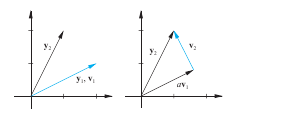


## Orthonormal Vectors

To convert the orthogonal vectors $ v_1 $ and $ v_2 $ to orthonormal vectors, divide each vector by its norm:
$$
\hat{v}_1 = \frac{v_1}{\|v_1\|}, \quad \hat{v}_2 = \frac{v_2}{\|v_2\|}
$$

This process ensures that the resulting vectors are both orthogonal and normalized.

For further experiments with the Gram-Schmidt process, consider implementing it in a Python script to visualize and manipulate sets of vectors.


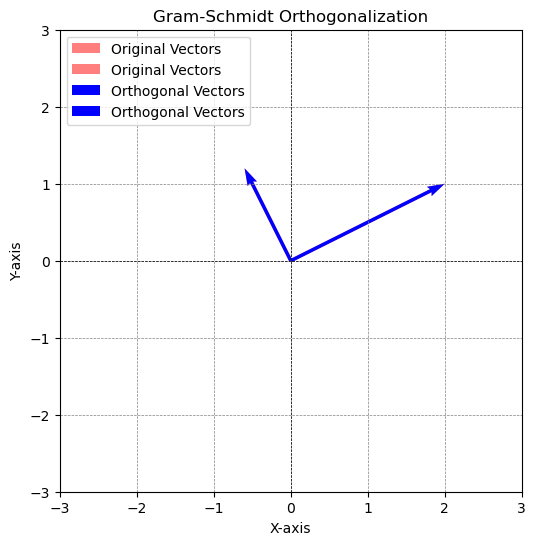

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def gram_schmidt(vectors):
    num_vectors = vectors.shape[0]
    orthogonal_vectors = np.zeros_like(vectors)

    for i in range(num_vectors):
        v = vectors[i]
        for j in range(i):
            proj = np.dot(v, orthogonal_vectors[j]) / np.dot(orthogonal_vectors[j], orthogonal_vectors[j])
            v -= proj * orthogonal_vectors[j]
        orthogonal_vectors[i] = v

    return orthogonal_vectors

# Example vectors
original_vectors = np.array([[2, 1], [1, 2]], dtype=float)

# Perform Gram-Schmidt orthogonalization
orthogonal_vectors = gram_schmidt(original_vectors)

# Plotting
plt.figure(figsize=(8, 6))

# Plot original vectors
for vec in original_vectors:
    plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5, label='Original Vectors')

# Plot orthogonal vectors
for vec in orthogonal_vectors:
    plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color='b', label='Orthogonal Vectors')

# Formatting the plot
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Gram-Schmidt Orthogonalization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='upper left')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [3]:
import numpy as np

def gram_schmidt(vectors):
    """
    Perform Gram-Schmidt orthogonalization on a set of vectors.
    
    Parameters:
    vectors (np.ndarray): An array of shape (n, m) where n is the number of vectors
                          and m is the dimension of each vector.
    
    Returns:
    np.ndarray: An array of orthogonal vectors.
    """
    # Number of vectors
    num_vectors = vectors.shape[0]
    # Initialize an array to hold orthogonal vectors
    orthogonal_vectors = np.zeros_like(vectors)

    for i in range(num_vectors):
        # Start with the original vector
        v = vectors[i]

        # Subtract the projections onto previously computed orthogonal vectors
        for j in range(i):
            # Calculate the projection of v onto the j-th orthogonal vector
            proj = np.dot(v, orthogonal_vectors[j]) / np.dot(orthogonal_vectors[j], orthogonal_vectors[j])
            # Update v by subtracting the projection
            v -= proj * orthogonal_vectors[j]

        # Store the orthogonal vector
        orthogonal_vectors[i] = v

    return orthogonal_vectors

# Example usage
vectors = np.array([[2, 1], [1, 2]], dtype=float)  # Ensure the input is float
orthogonal_vectors = gram_schmidt(vectors)
print("Orthogonal Vectors:")
print(orthogonal_vectors)


Orthogonal Vectors:
[[ 2.   1. ]
 [-0.6  1.2]]


## Reciprocal Basis Vectors

If a vector expansion is required and the basis set is not orthogonal, the reciprocal basis vectors are introduced. These are defined by the following equations:

$$
\begin{align*}
(r_i, v_j) &= 0 \quad \text{for } i \neq j \\
(r_i, v_j) &= 1 \quad \text{for } i = j
\end{align*}
$$

where the basis vectors are $\{ v_1, v_2, \ldots, v_n \}$ and the reciprocal basis vectors are $\{ r_1, r_2, \ldots, r_n \}$. If the vectors have been represented by columns of numbers (through vector expansion), and the standard inner product is used:

$$
(r_i, v_j) = r_i^T v_j
$$

then Eq. (5.28) can be represented in matrix form as:

$$
R^T B = I
$$

where

$$
B = \begin{bmatrix}
v_1 & v_2 & \cdots & v_n
\end{bmatrix}
$$

and

$$
R = \begin{bmatrix}
r_1 & r_2 & \cdots & r_n
\end{bmatrix}
$$

Therefore, $R$ can be found from:

$$
R = (B^T)^{-1}
$$

and the reciprocal basis vectors can be obtained from the columns of $R$.

Now consider again the vector expansion:

$$
x = x_1 v_1 + x_2 v_2 + \cdots + x_n v_n
$$

Taking the inner product of $r_1$ with both sides of Eq. (5.34), we obtain:

$$
(r_1, x) = x_1 (r_1, v_1) + x_2 (r_1, v_2) + \cdots + x_n (r_1, v_n)
$$

By definition:

$$
\begin{align*}
(r_1, v_2) &= 0 \\
(r_1, v_3) &= 0 \\
&\vdots \\
(r_1, v_n) &= 0 \\
(r_1, v_1) &= 1
\end{align*}
$$

Therefore the first coefficient of the expansion is:

$$
x_1 = (r_1, x)
$$

and in general:

$$
x_j = (r_j, x)
$$

As an example, consider the two basis vectors:

$$
\begin{bmatrix}
v_1 \\
v_2
\end{bmatrix} = \begin{bmatrix}
2 \\
1
\end{bmatrix}
$$

Suppose that we want to expand the vector:

$$
x = \begin{bmatrix}
0 \\
3
\end{bmatrix}
$$

in terms of the two basis vectors. The first step in the vector expansion is to find the reciprocal basis vectors:

$$
R = \begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}^{-1} = \begin{bmatrix}
\frac{-1}{3} & \frac{1}{3} \\
\frac{1}{3} & \frac{-1}{3}
\end{bmatrix}
$$

Now we can find the coefficients in the expansion:

$$
\begin{align*}
x_1 &= (r_1, x) = \begin{bmatrix}
\frac{-1}{3} & \frac{1}{3}
\end{bmatrix} \begin{bmatrix}
0 \\
3
\end{bmatrix} = -1 \\
x_2 &= (r_2, x) = \begin{bmatrix}
\frac{1}{3} & \frac{-1}{3}
\end{bmatrix} \begin{bmatrix}
0 \\
3
\end{bmatrix} = 1
\end{align*}
$$

Or, in matrix form:

$$
\begin{bmatrix}
2 \\
1
\end{bmatrix}^T x = R x = B x = \begin{bmatrix}
3 \\
2
\end{bmatrix}
$$

Thus, we have:

$$
x = -\frac{1}{2} v_1 + 1 v_2
$$

As indicated in Figure 5.2.
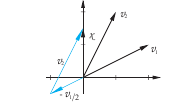
$$
x = 0 s_1 + \frac{3}{2} s_2 = -\frac{1}{2} v_1 + 1 v_2
$$

When we represent a general vector as a column of numbers, we need to know what basis set was used for the expansion. In this text, unless otherwise stated, assume the standard basis set was used. Eq. (5.43) shows the relationship between the two different representations of $x$:

$$
x = B x
$$

This operation, called a change of basis, will become very important in later chapters for the performance analysis of certain neural networks. To experiment with the vector expansion process, use the Neural Network Design Demonstration Reciprocal Basis (nnd5rb).


Original Matrix A:
[[-1  1]
 [ 0 -2]]

Diagonalized Matrix A (should be close to A):
[[-1.  1.]
 [ 0. -2.]]


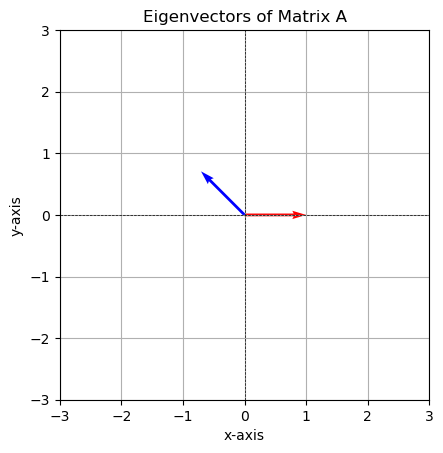

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the transformation matrix A
A = np.array([[-1, 1],
              [0, -2]])

# Step 2: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Step 3: Diagonalize the matrix
# B is the matrix of eigenvectors
B = eigenvectors
# D is the diagonal matrix of eigenvalues
D = np.diag(eigenvalues)
# Verify the diagonalization A = BDB^-1
A_diagonalized = B @ D @ np.linalg.inv(B)

# Step 4: Verify the diagonalization
print("Original Matrix A:")
print(A)
print("\nDiagonalized Matrix A (should be close to A):")
print(A_diagonalized)

# Step 5: Visualizing the eigenvectors and transformation
origin = np.zeros((2, 2))  # origin point
plt.quiver(*origin, eigenvectors[0, :], eigenvectors[1, :], color=['r', 'b'], angles='xy', scale_units='xy', scale=1)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid()
plt.axhline(0, color='black',linewidth=0.5, ls='dashed')
plt.axvline(0, color='black',linewidth=0.5, ls='dashed')
plt.title('Eigenvectors of Matrix A')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
